[Reference](https://medium.com/towards-artificial-intelligence/understanding-multiple-linear-regression-1b4a5b939f5a)

In [10]:
# importing required libraries

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import pylab as pl
import numpy as np

In [3]:
# First Let's import our Data set
data = "https://raw.githubusercontent.com/Blackman9t/Machine_Learning/master/Original_2000_2014_Fuel_Consumption_Ratings.csv"

# Next let's define additional representation of null values 
# To help us select all possible null values in case they exist

missing_data = ['n/a','na','--','?','non','Non','None']

In [4]:
fuel_df = pd.read_csv(data, na_values=missing_data)

#Next let's print out the first five rows

fuel_df.head()

,MODEL_YEAR,MAKE,MODEL,VEHICLE_CLASS,ENGINE_SIZE(L),CYLINDERS,TRANSMISSION,FUEL_TYPE,FUEL_CONSUMPTION_CITY(L/100km),HWY_(L/100km),COMB_(L/100km),COMB_(mpg),CO2_EMISSIONS(g/km)
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


In [5]:
fuel_df.shape

(14343, 13)

In [6]:
fuel_df.isna().any().all()

False

In [7]:
fuel_df.rename(columns={'FUEL_CONSUMPTION_CITY(L/100km)':'FUEL_CONS_CITY', 
                        'ENGINE_SIZE(L)':'ENGINE_SIZE',
                       'HWY_(L/100km)':'HWY_L100km',
                       'COMB_(L/100km)':'COMB_L100km',
                       'COMB_(mpg)':'COMB_MPG',
                       'CO2_EMISSIONS(g/km)':'CO2_EMISSIONS'},
                       inplace=True)

In [8]:
fuel_df.head()

,MODEL_YEAR,MAKE,MODEL,VEHICLE_CLASS,ENGINE_SIZE,CYLINDERS,TRANSMISSION,FUEL_TYPE,FUEL_CONS_CITY,HWY_L100km,COMB_L100km,COMB_MPG,CO2_EMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,9.2,6.7,8.1,35,186
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,8.5,6.5,7.6,37,175
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,12.2,7.4,10.0,28,230
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,13.4,9.2,11.5,25,264
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,10.0,7.0,8.6,33,198


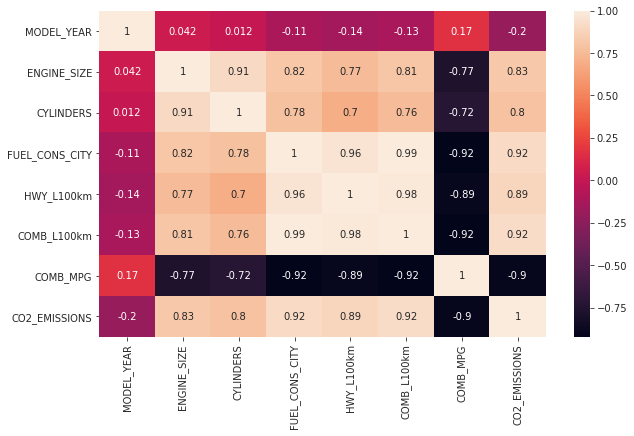

In [11]:
# Let's plot the correlation of the data set using a heatmap from seaborn library

corr_data = fuel_df.corr()

plt.figure(figsize=(10, 6))
sns.set_style('ticks')

sns.heatmap(corr_data, annot=True)

plt.show()

In [12]:
data = fuel_df[['ENGINE_SIZE','CYLINDERS','FUEL_CONS_CITY','COMB_MPG', 'HWY_L100km', 'COMB_L100km']]

data.head()

,ENGINE_SIZE,CYLINDERS,FUEL_CONS_CITY,COMB_MPG,HWY_L100km,COMB_L100km
0,1.6,4,9.2,35,6.7,8.1
1,1.6,4,8.5,37,6.5,7.6
2,3.2,6,12.2,28,7.4,10.0
3,3.5,6,13.4,25,9.2,11.5
4,1.8,4,10.0,33,7.0,8.6


In [13]:
def standardize(data_features):
    data_features = (data_features - data_features.mean()) /   data_features.std()
    return data_features

In [14]:
std_data = data.apply(standardize, axis=0)
std_data.head()

,ENGINE_SIZE,CYLINDERS,FUEL_CONS_CITY,COMB_MPG,HWY_L100km,COMB_L100km
0,-1.429815,-1.119788,-1.046373,1.019024,-0.902562,-0.998244
1,-1.429815,-1.119788,-1.243575,1.285557,-0.987882,-1.166213
2,-0.209256,0.006162,-0.201224,0.086159,-0.603942,-0.359962
3,0.019599,0.006162,0.136836,-0.313640,0.163939,0.143945
4,-1.277245,-1.119788,-0.821000,0.752491,-0.774582,-0.830275


In [15]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(std_data.values, i) for i in range(std_data.shape[1])]
vif["features"] = std_data.columns

vif
# This displays the following:-

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,VIF_Factor,features
0,6.947478,ENGINE_SIZE
1,6.338015,CYLINDERS
2,1818.224119,FUEL_CONS_CITY
3,6.832871,COMB_MPG
4,533.988354,HWY_L100km
5,4184.504559,COMB_L100km


As suspected, three variables(FUEL_CONS_CITY, HWY_L/100km, and COMB_L100Km) have extreme high colinearity values and should be dropped,

In [17]:
vif = pd.DataFrame()
vif["VIF_Factor"] = [variance_inflation_factor(std_data.values, i) for i in range(std_data.shape[1])]
vif["features"] = std_data.columns
vif
# This outputs the following:-

,VIF_Factor,features
0,6.947478,ENGINE_SIZE
1,6.338015,CYLINDERS
2,1818.224119,FUEL_CONS_CITY
3,6.832871,COMB_MPG
4,533.988354,HWY_L100km
5,4184.504559,COMB_L100km


In [18]:
# Save the un-standardized data with moderate VIF attributes as X
X = data[['ENGINE_SIZE','CYLINDERS','COMB_MPG']]

# Define a column of ones, the length of X
ones = np.ones(len(X), dtype= 'int8')

# Insert The column of ones to the first position of X
X.insert(0, 'Ones', ones)

# Display first 5 rows of X
X.head()

# Now we define target matrix y(an m * 1 column vector)
y = fuel_df.CO2_EMISSIONS
y.head()

0    186
1    175
2    230
3    264
4    198
Name: CO2_EMISSIONS, dtype: int64

In [19]:
# Import train_test_split for splitting the data set
from sklearn.model_selection import train_test_split

# split the data set into training and testing sets.
X, X_test, y, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

# Display the shapes of each split
print('X shape is:',X.shape)
print('y shape is:',y.shape)
print('X_test shape is:',X_test.shape)
print('y_test shape is:',y_test.shape)

X shape is: (10757, 4)
y shape is: (10757,)
X_test shape is: (3586, 4)
y_test shape is: (3586,)


In [20]:
# First we convert X and X_test, y, y_test to Numpy arrays for ease of computing
X = X.values
X_test = X_test.values
y = y.values
y_test = y_test.values

# Next we define X_trans, the Transpose of X matrix
X_trans = X.transpose()

print('X-Trans shape:',X_trans.shape)

X-Trans shape: (4, 10757)


In [21]:
# Post-multiply X_trans by X
X_trans_X = np.matmul(X_trans, X)

# Print out the shape of X_trans_X
print('X_Trans_X shape:',X_trans_X.shape)

X_Trans_X shape: (4, 4)


In [22]:
# Import inv from numpy.linear algebra
from numpy.linalg import inv

# define X_trans_X_inv
X_trans_X_inv = inv(X_trans_X)

# Print the shape of X_trans_X_inv
print("Shape of X_trans_X_inv is",X_trans_X_inv.shape)

Shape of X_trans_X_inv is (4, 4)


In [23]:
# Let's Post-multiply X_trans_X_inv by X_trans
X_trans_X_inv_X_trans = np.matmul(X_trans_X_inv, X_trans)

# Let's print the shape
print("Shape of X_trans_X_inv_X_trans is",X_trans_X_inv_X_trans.shape)

Shape of X_trans_X_inv_X_trans is (4, 10757)


In [24]:
# Matrix b or coefficients defined as:
b = np.matmul(X_trans_X_inv_X_trans, y)

# Let's print the shape of b
print('Shape of matrix b or coefficients is:', b.shape)

# Print the values of b
print(b)

Shape of matrix b or coefficients is: (4,)
[324.65663725   8.081279     5.69448484  -5.05910396]


In [29]:
intercept = b[0]
b1 = b[1]
b2 = b[2]
b3 = b[3]

In [53]:
# Let's define a simple method for prediction
def predict(x):
    """ takes a row of test data and predicts it
    and returns the summed value of the observation"""
    x = list(x)
    
    x = x[0]*intercept + x[1]*b1 + x[2]*b2 + x[3]*b3
    
    return x

In [54]:
X_eval = pd.DataFrame(X_test)

In [55]:
y_hat = np.ceil(X_eval.apply(predict, axis=1).values)

In [56]:
# First import metrics from sklearn
from sklearn.metrics import mean_squared_error, r2_score

MSE = mean_squared_error(y_test, y_hat)
RMSE = MSE**0.5# Let's print out the MSE and RMSE
print(MSE)
print(RMSE)

479.4438661710037
21.896206661680093


In [57]:
# First we find the range of the target variable, y
y_range = y_test.max() - y_test.min()

# Then we compute the RMSE as a percentage of the range of y
error_margin = error_margin = (RMSE / y_range) * 100

# Next we compute the r2_score
matrix_r2_score = r2_score(y_test, y_hat)  # pass in the true values first, then the predicted values.
matrix_r2_score

# Let's print out the error_margin and r2_score
print(error_margin)
print(matrix_r2_score)

5.379903356678155
0.8565026825942564


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an err

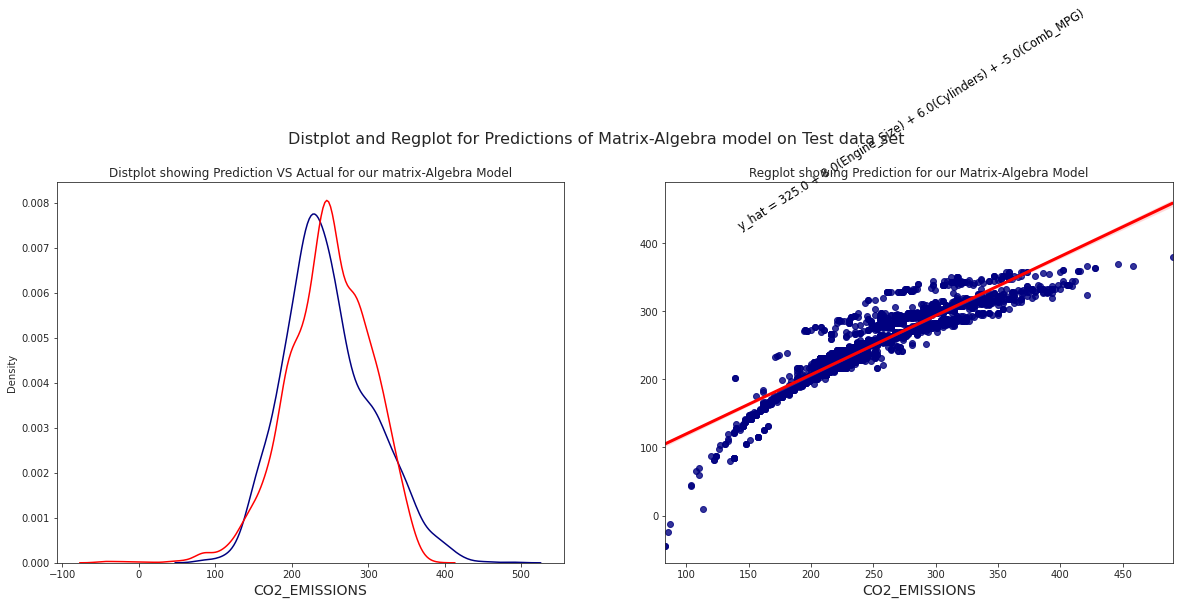

In [58]:
fig = plt.figure(figsize=(20, 7))
plt.suptitle('Distplot and Regplot for Predictions of Matrix-Algebra model on Test data set', fontsize=16)

ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

# plotting the Distplot
sns.distplot(y_test.squeeze(), hist=False, label='Target', color='navy', ax=ax)
sns.distplot(y_hat.squeeze(), hist=False, label='Prediction', color='red', ax=ax)
ax.set_xlabel('CO2_EMISSIONS', fontsize=14)
ax.set_title('Distplot showing Prediction VS Actual for our matrix-Algebra Model')

# plotting the Regplot
sns.regplot(y_test.squeeze(), y_hat, scatter_kws={"color": "navy"}, line_kws={"color": "red" ,'linewidth':3}, ax=ax1)
ax1.annotate('y_hat = {} + {}(Engine_Size) + {}(Cylinders) + {}(Comb_MPG)'.format(np.round(intercept), 
                                                             np.round(b1), 
                                                             np.round(b2), 
                                                             np.round(b3)), 
                                                             xy=(140,420), 
                                                             rotation=32, 
                                                             fontsize=11.5, color='black')
ax1.set_xlabel('CO2_EMISSIONS', fontsize=14)
ax1.set_title('Regplot showing Prediction for our Matrix-Algebra Model')



plt.show()

In [35]:
# first import sklearn linear regression
from sklearn.linear_model import LinearRegression

# Instantiate a Linear regression model
model = LinearRegression()

In [47]:
X, X_test, y, y_test = train_test_split(X, y, test_size=0.25, shuffle=True)

In [48]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
# The Slope or gradient
model_slope = model.coef_

# the intercept or bias unit
model_intercept = model.intercept_

print('Slope =', model_slope,'\nIntercept = ',model_intercept)

Slope = [ 0.          7.91425093  5.79688507 -5.09619945] 
Intercept =  325.6557364575185


In [50]:
y_pred = model.predict(X_test)

In [59]:
model_mse = mean_squared_error(y_test, y_pred)
model_rmse = model_mse ** 0.5
model_error_margin = (model_rmse / y_range) * 100
model_r2_score = r2_score(y_test, y_pred)
model_r2_score

0.8567986856273564

In [60]:
summary_dict = {'algebra_model':[intercept, b1, b2, b3, MSE, RMSE, error_margin, matrix_r2_score],
               'sklearn_model':[model_intercept, model_slope[1], model_slope[2], model_slope[3], model_mse, model_rmse, model_error_margin, model_r2_score]}

summary_df = pd.DataFrame(summary_dict, index=['Intercept','b1','b2','b3','MSE','RMSE','Error_margin','R2_score'])
summary_df

,algebra_model,sklearn_model
Intercept,324.656637,325.655736
b1,8.081279,7.914251
b2,5.694485,5.796885
b3,-5.059104,-5.096199
MSE,479.443866,478.454880
RMSE,21.896207,21.873612
Error_margin,5.379903,5.374352
R2_score,0.856503,0.856799


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an err

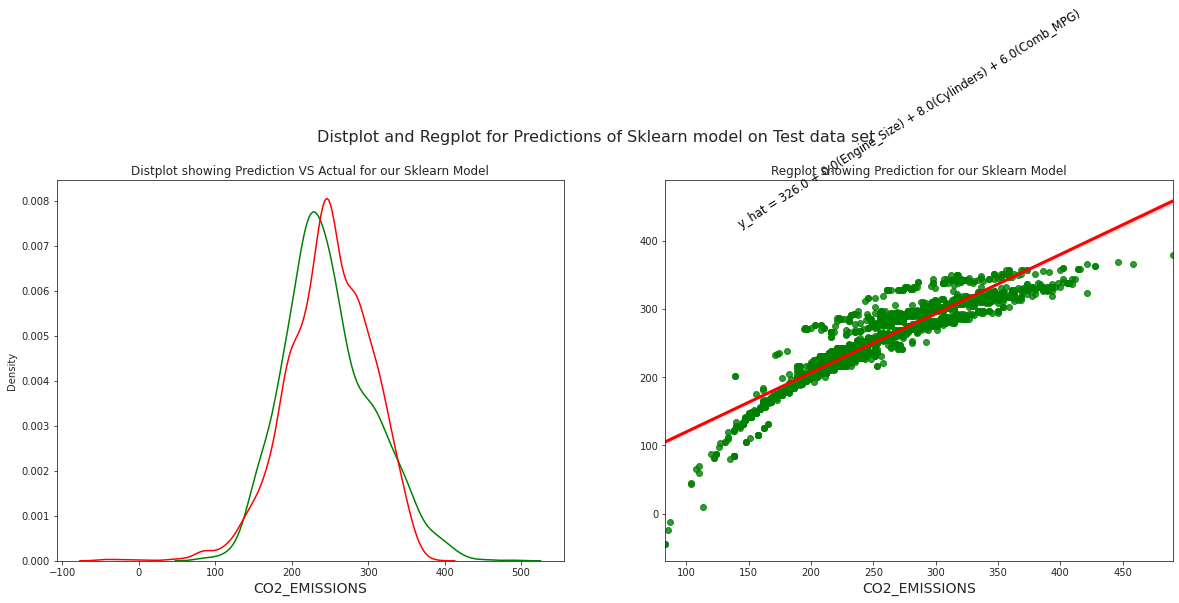

In [61]:
fig = plt.figure(figsize=(20, 7))
plt.suptitle('Distplot and Regplot for Predictions of Sklearn model on Test data set', fontsize=16)

ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)

# plotting the Distplot
sns.distplot(y_test.squeeze(), hist=False, label='Target', color='green', ax=ax)
sns.distplot(y_hat.squeeze(), hist=False, label='Prediction', color='red', ax=ax)
ax.set_xlabel('CO2_EMISSIONS', fontsize=14)
ax.set_title('Distplot showing Prediction VS Actual for our Sklearn Model')

# plotting the Regplot
sns.regplot(y_test.squeeze(), y_hat, scatter_kws={"color": "green"}, line_kws={"color": "red" ,'linewidth':3}, ax=ax1)
ax1.annotate('y_hat = {} + {}(Engine_Size) + {}(Cylinders) + {}(Comb_MPG)'.format(np.round(model_intercept), 
                                                             np.round(model_slope[0]), 
                                                             np.round(model_slope[1]), 
                                                             np.round(model_slope[2])), 
                                                             xy=(140,420), 
                                                             rotation=32, 
                                                             fontsize=11.5, color='black')
ax1.set_xlabel('CO2_EMISSIONS', fontsize=14)
ax1.set_title('Regplot showing Prediction for our Sklearn Model')



plt.show()